In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
! wget https://github.com/ramik0115/brAInwave_H14_DataSource/blob/main/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

--2024-10-25 11:02:06--  https://github.com/ramik0115/brAInwave_H14_DataSource/blob/main/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv.1’

acetylcholinesteras     [  <=>               ] 286.20K   908KB/s    in 0.3s    

2024-10-25 11:02:07 (908 KB/s) - ‘acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv.1’ saved [293068]



In [3]:
df = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

# Input Features

In [4]:
## Each molecule has a unique fingerprint, train it further to distinguish between the active and inactive molecules or which fingerprint or functional group is essential
## in designing a good or potent drug. The target variable used is pIC50 (-log(IC50)) and IC50 is the inhibition concentration at 50%

X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4691,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4692,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4693,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
Y = df.pIC50
Y

,pIC50
0,6.124939
1,7.000000
2,4.301030
3,6.522879
4,6.096910
...,...
4690,5.612610
4691,5.595166
4692,5.419075
4693,5.460924


In [6]:
X.shape

(4695, 881)

In [7]:
Y.shape

(4695,)

In [8]:
## Remove the low variance features.

## Removing low variance features refers to the process of eliminating features from a dataset that exhibit very little variation across the different instances or samples.
## By removing low variance features, you can simplify the model, potentially improve its performance, and reduce computational complexity.

from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)

In [9]:
X.shape

(4695, 137)

# Splitting the data

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [11]:
X_train.shape, Y_train.shape

((3756, 137), (3756,))

In [12]:
X_test.shape, Y_test.shape

((939, 137), (939,))

# Building a Regression model using Random Forest Regressor

In [13]:
import numpy as np
np.random.seed(100)

rfr_model = RandomForestRegressor(n_estimators=100)
rfr_model.fit(X_train, Y_train)

RandomForestRegressor()

In [14]:
from sklearn.tree import DecisionTreeRegressor
classifier= DecisionTreeRegressor(max_depth=3)
classifier.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=3)

In [15]:
Y_pred1 = classifier.predict(X_test)

In [16]:
Y_pred = rfr_model.predict((X_test))

# Analysis of between the experimental and predicted values

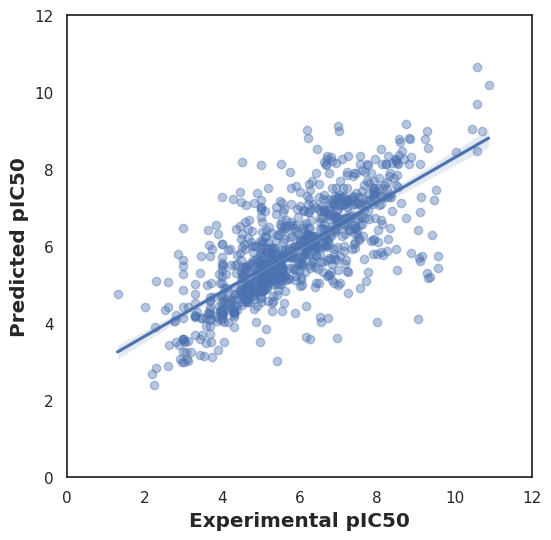

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")
plt.figure(figsize=(6, 6))

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
plt.show()